# HW-3 -- EPA

Analysis of EPA Air Quality Index (AQI)

# AQI Data

Source: [EPA air quality index (AQI) data by county](https://aqs.epa.gov/aqsweb/airdata/download_files.html) -- epa.gov

* There are quite a few datasets available for download
* We're interested in "Annual Summary Data" for "AQI by County"
* Data are available as a collection of ".zip" files
* One file for each year from 1980 to present, for example:
* https://aqs.epa.gov/aqsweb/airdata/annual_aqi_by_county_2021.zip


# Question 1

Load "AQI by county" data for 1980 through 2019 into a single dataframe.

Get the data from the [EPA API for pre-generated files](https://aqs.epa.gov/aqsweb/airdata/download_files.html).

Remove Mexico and Canada from the dataframe since we're interested in only in US States. Report the shape of the dataframe without these countries.



In [1]:
import pandas as pd
def reading_data(start_year=1980,end_year=2019):
  url_front='https://aqs.epa.gov/aqsweb/airdata/annual_aqi_by_county_'
  url_back='.zip'
  data=pd.DataFrame()
  for year in range(start_year,end_year+1):
    url=url_front+str(year)+url_back
    data=data.append(pd.read_csv(url))
  return data

df=reading_data()
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Autauga,1980,179,122,35,18,4,0,0,177,108,40,0,0,122,57,0,0
1,Alabama,Colbert,1980,274,127,45,63,39,0,0,200,165,56,0,0,0,274,0,0
2,Alabama,Jackson,1980,366,85,110,92,79,0,0,200,200,94,0,0,0,366,0,0
3,Alabama,Jefferson,1980,343,171,109,37,19,7,0,221,140,51,207,0,136,0,0,0
4,Alabama,Lauderdale,1980,274,120,58,77,19,0,0,200,139,56,0,0,0,274,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,Wyoming,Sublette,2019,365,266,88,8,3,0,0,200,71,46,0,0,363,0,2,0
1049,Wyoming,Sweetwater,2019,365,262,100,3,0,0,0,133,64,46,0,4,321,0,5,35
1050,Wyoming,Teton,2019,365,326,39,0,0,0,0,87,51,43,0,0,359,0,4,2
1051,Wyoming,Uinta,2019,365,315,49,1,0,0,0,101,58,44,0,1,360,0,0,4


In [2]:
df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Virgin Islands', 'Wyoming',
       'South Dakota', 'Guam', 'Country Of Mexico', 'Canada'],
      dtype=object)

In [3]:
df=df[(df['State']!='Country Of Mexico') & (df['State']!='Canada')]
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Autauga,1980,179,122,35,18,4,0,0,177,108,40,0,0,122,57,0,0
1,Alabama,Colbert,1980,274,127,45,63,39,0,0,200,165,56,0,0,0,274,0,0
2,Alabama,Jackson,1980,366,85,110,92,79,0,0,200,200,94,0,0,0,366,0,0
3,Alabama,Jefferson,1980,343,171,109,37,19,7,0,221,140,51,207,0,136,0,0,0
4,Alabama,Lauderdale,1980,274,120,58,77,19,0,0,200,139,56,0,0,0,274,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,Wyoming,Sublette,2019,365,266,88,8,3,0,0,200,71,46,0,0,363,0,2,0
1049,Wyoming,Sweetwater,2019,365,262,100,3,0,0,0,133,64,46,0,4,321,0,5,35
1050,Wyoming,Teton,2019,365,326,39,0,0,0,0,87,51,43,0,0,359,0,4,2
1051,Wyoming,Uinta,2019,365,315,49,1,0,0,0,101,58,44,0,1,360,0,0,4


In [4]:
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Virgin Islands', 'Wyoming',
       'South Dakota', 'Guam'], dtype=object)

The shape of the dataframe without Mexico and Canada is 38419 rows and 19 columns

# Question 2

Plot the distribution as a function of time. Describe the primary features.

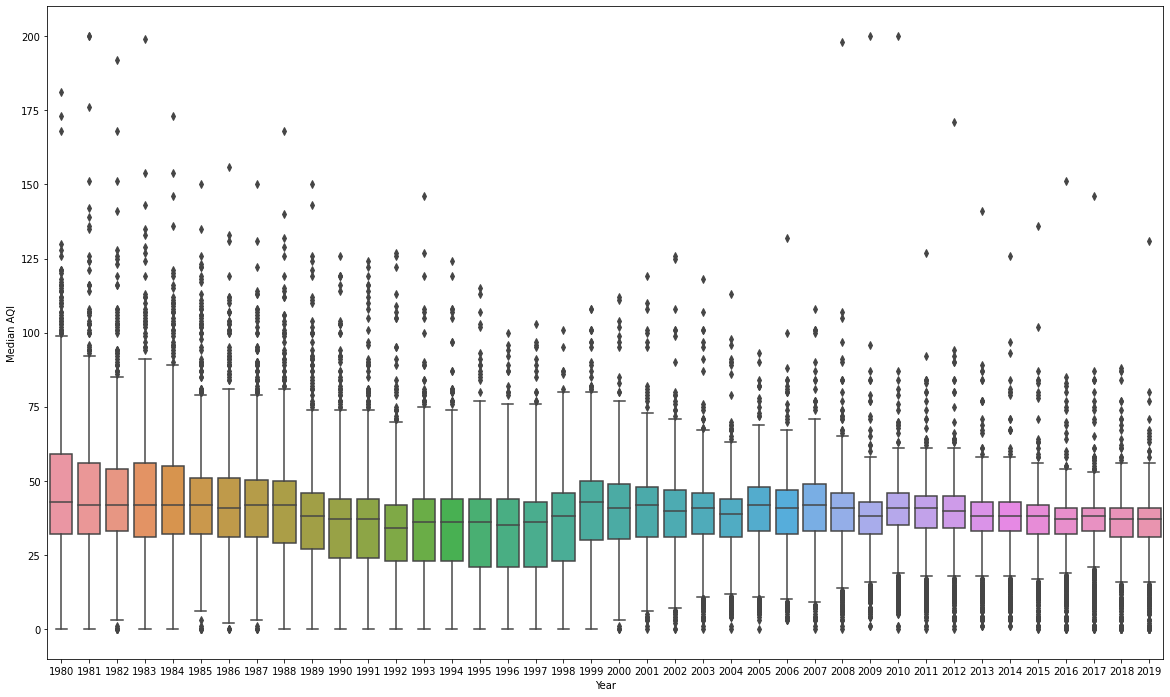

In [5]:
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(20,12))
sns.boxplot(x="Year", y="Median AQI", data=df)

The median of the data over the years is bound to only minor fluctuations. For certain years the median is same. The data also has a lot of outliers.

# Question 3

Create state-wide averages of "Median AQI", and plot distributions again. What do you learn from the state-wide average?

In [6]:

#mean_df=df.groupby(['Year','State']).agg({'Median AQI':'mean'})
#mean_df=df.groupby(['State', 'Year']).mean()['Median AQI'].unstack()
mean_df=df[["State", "Median AQI","Year"]].groupby(['State', 'Year']).mean()['Median AQI'].unstack()

#mean_df=mean_df.melt()

mean_df


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,51.100000,49.818182,37.363636,38.666667,31.750000,33.500000,39.800000,39.909091,36.888889,28.933333,30.956522,28.416667,27.760000,31.833333,30.680000,30.960000,29.423077,28.692308,31.961538,47.590909,48.913043,42.409091,41.173913,42.000000,42.080000,43.291667,44.125000,47.761905,44.315789,39.526316,46.157895,42.789474,40.176471,37.166667,38.166667,39.333333,39.388889,38.277778,36.411765,38.647059
Alaska,35.250000,34.666667,20.500000,28.000000,44.500000,44.333333,40.000000,30.000000,22.666667,25.166667,23.857143,27.333333,34.800000,28.000000,25.800000,26.600000,28.500000,27.750000,24.200000,21.833333,22.666667,19.625000,21.000000,17.857143,15.300000,16.222222,17.625000,16.875000,14.222222,18.000000,19.750000,22.375000,22.125000,20.375000,23.500000,23.125000,24.142857,22.000000,22.000000,19.222222
Arizona,89.555556,97.900000,63.400000,66.600000,71.500000,65.090909,57.727273,46.909091,45.000000,47.454545,39.166667,35.153846,33.692308,33.272727,35.500000,36.090909,39.750000,39.083333,43.545455,49.000000,42.538462,41.692308,44.769231,46.923077,44.384615,43.714286,51.428571,49.571429,51.153846,47.230769,46.000000,47.846154,49.538462,46.461538,46.230769,43.615385,45.692308,47.230769,44.923077,42.769231
Arkansas,26.000000,20.000000,19.000000,17.333333,21.500000,22.250000,24.750000,27.000000,27.000000,22.842105,22.842105,24.619048,22.904762,24.200000,24.650000,25.800000,24.350000,23.200000,32.571429,47.111111,49.761905,46.476190,40.809524,43.380952,40.352941,47.533333,42.125000,42.250000,39.000000,36.937500,41.352941,40.470588,38.071429,34.909091,33.363636,32.454545,33.545455,37.090909,35.416667,36.153846
California,54.682927,55.558140,52.000000,50.100000,54.775000,55.170732,55.063830,53.142857,53.607843,52.820000,49.392157,49.647059,48.882353,48.360000,50.018868,47.074074,45.178571,44.250000,42.678571,50.982143,47.607143,49.163636,51.685185,50.648148,49.849057,46.000000,47.735849,48.981132,50.905660,47.566038,45.339623,49.425926,48.703704,49.425926,48.888889,49.425926,46.388889,49.037736,48.792453,43.830189
Colorado,44.400000,44.300000,43.400000,45.100000,43.500000,37.823529,42.250000,38.444444,32.750000,32.480000,28.785714,31.222222,30.857143,33.269231,32.250000,30.793103,30.448276,29.793103,31.206897,29.533333,29.700000,29.533333,30.928571,30.571429,29.035714,30.464286,30.964286,37.448276,36.166667,35.375000,36.500000,38.812500,40.258065,39.633333,36.600000,35.451613,35.187500,36.437500,39.060606,34.071429
Connecticut,67.333333,60.000000,62.500000,58.500000,54.666667,54.333333,51.666667,50.333333,42.750000,42.375000,38.625000,41.000000,35.250000,37.625000,41.375000,38.500000,35.625000,38.125000,39.625000,43.875000,40.875000,43.875000,44.875000,44.625000,41.750000,43.000000,41.125000,41.250000,40.500000,36.375000,39.750000,39.500000,42.375000,44.000000,41.875000,41.000000,40.250000,38.375000,37.625000,39.500000
Delaware,40.666667,21.666667,35.333333,56.000000,54.666667,58.666667,52.000000,56.666667,60.000000,57.666667,54.666667,50.000000,45.666667,53.333333,52.333333,51.000000,47.000000,49.000000,54.000000,55.333333,53.000000,57.333333,55.333333,52.000000,51.666667,54.333333,53.000000,50.666667,49.333333,44.000000,46.666667,44.000000,43.333333,42.000000,44.666667,43.666667,41.333333,41.333333,40.000000,42.333333
District Of Columbia,69.000000,69.000000,62.000000,62.000000,61.000000,64.000000,65.000000,62.000000,44.000000,52.000000,59.000000,60.000000,54.000000,56.000000,58.000000,52.000000,50.000000,47.000000,50.000000,60.000000,59.000000,62.000000,58.000000,58.000000,57.000000,57.000000,54.000000,54.000000,51.000000,49.000000,51.000000,54.000000,56.000000,48.000000,47.000000,47.000000,47.000000,51.000000,44.000000,44.000000


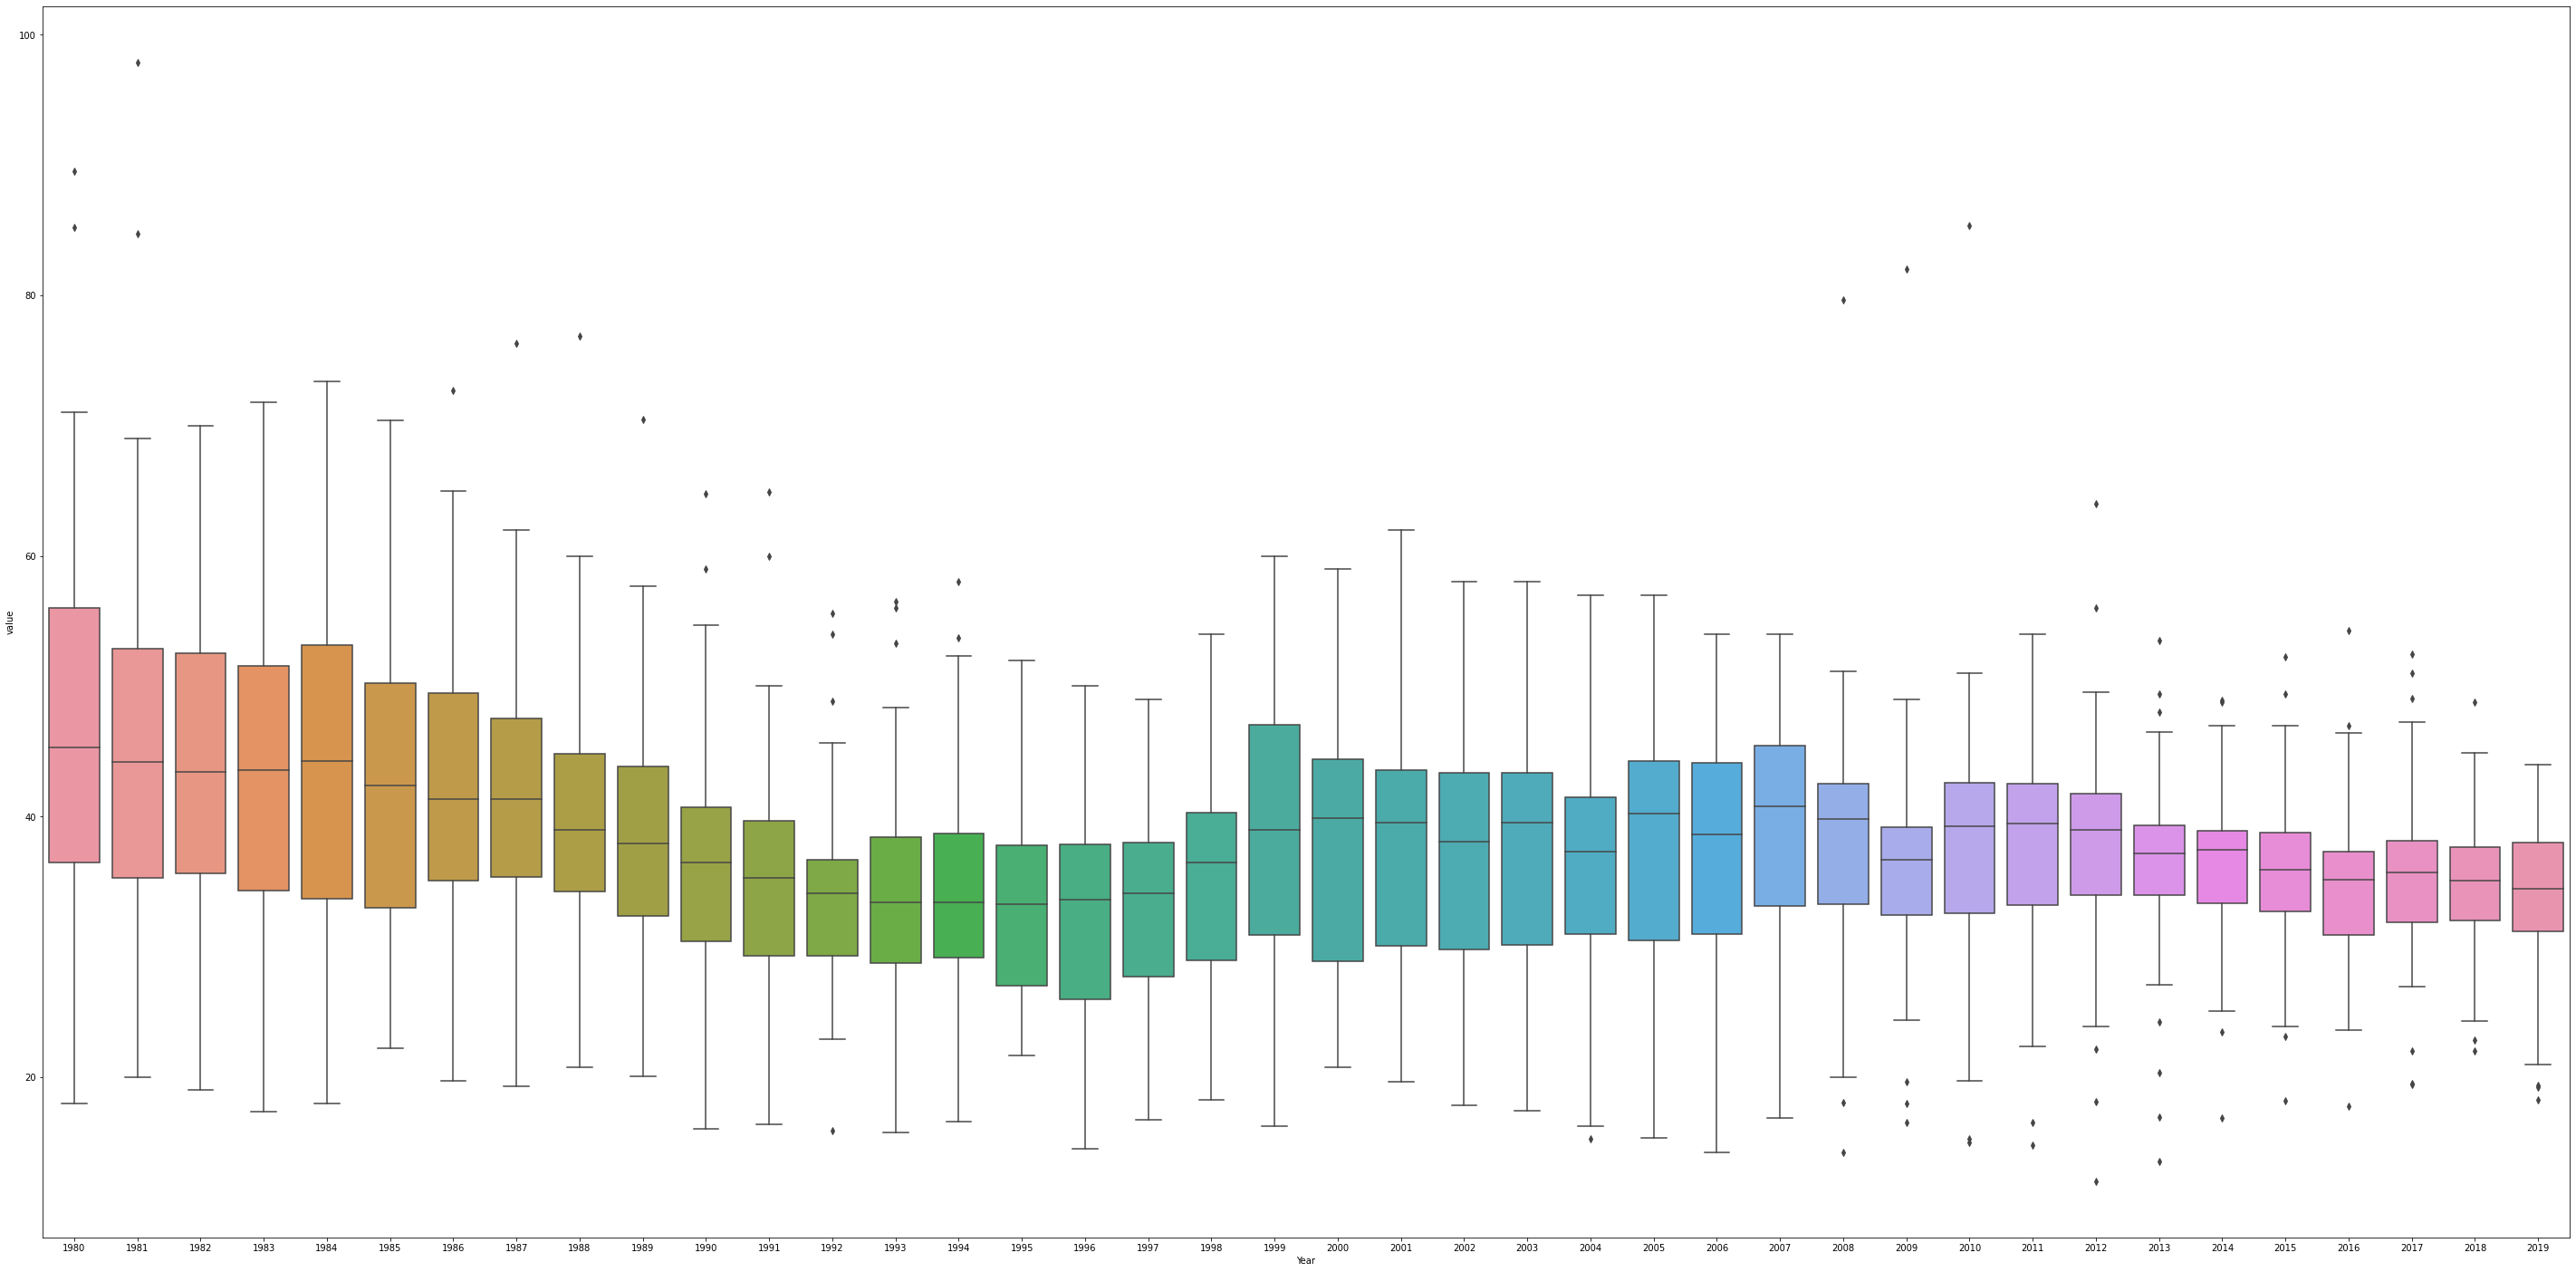

In [7]:
fig, ax = pyplot.subplots(figsize=(50,25))

sns.boxplot(x="Year", y="value", data=pd.melt(mean_df))

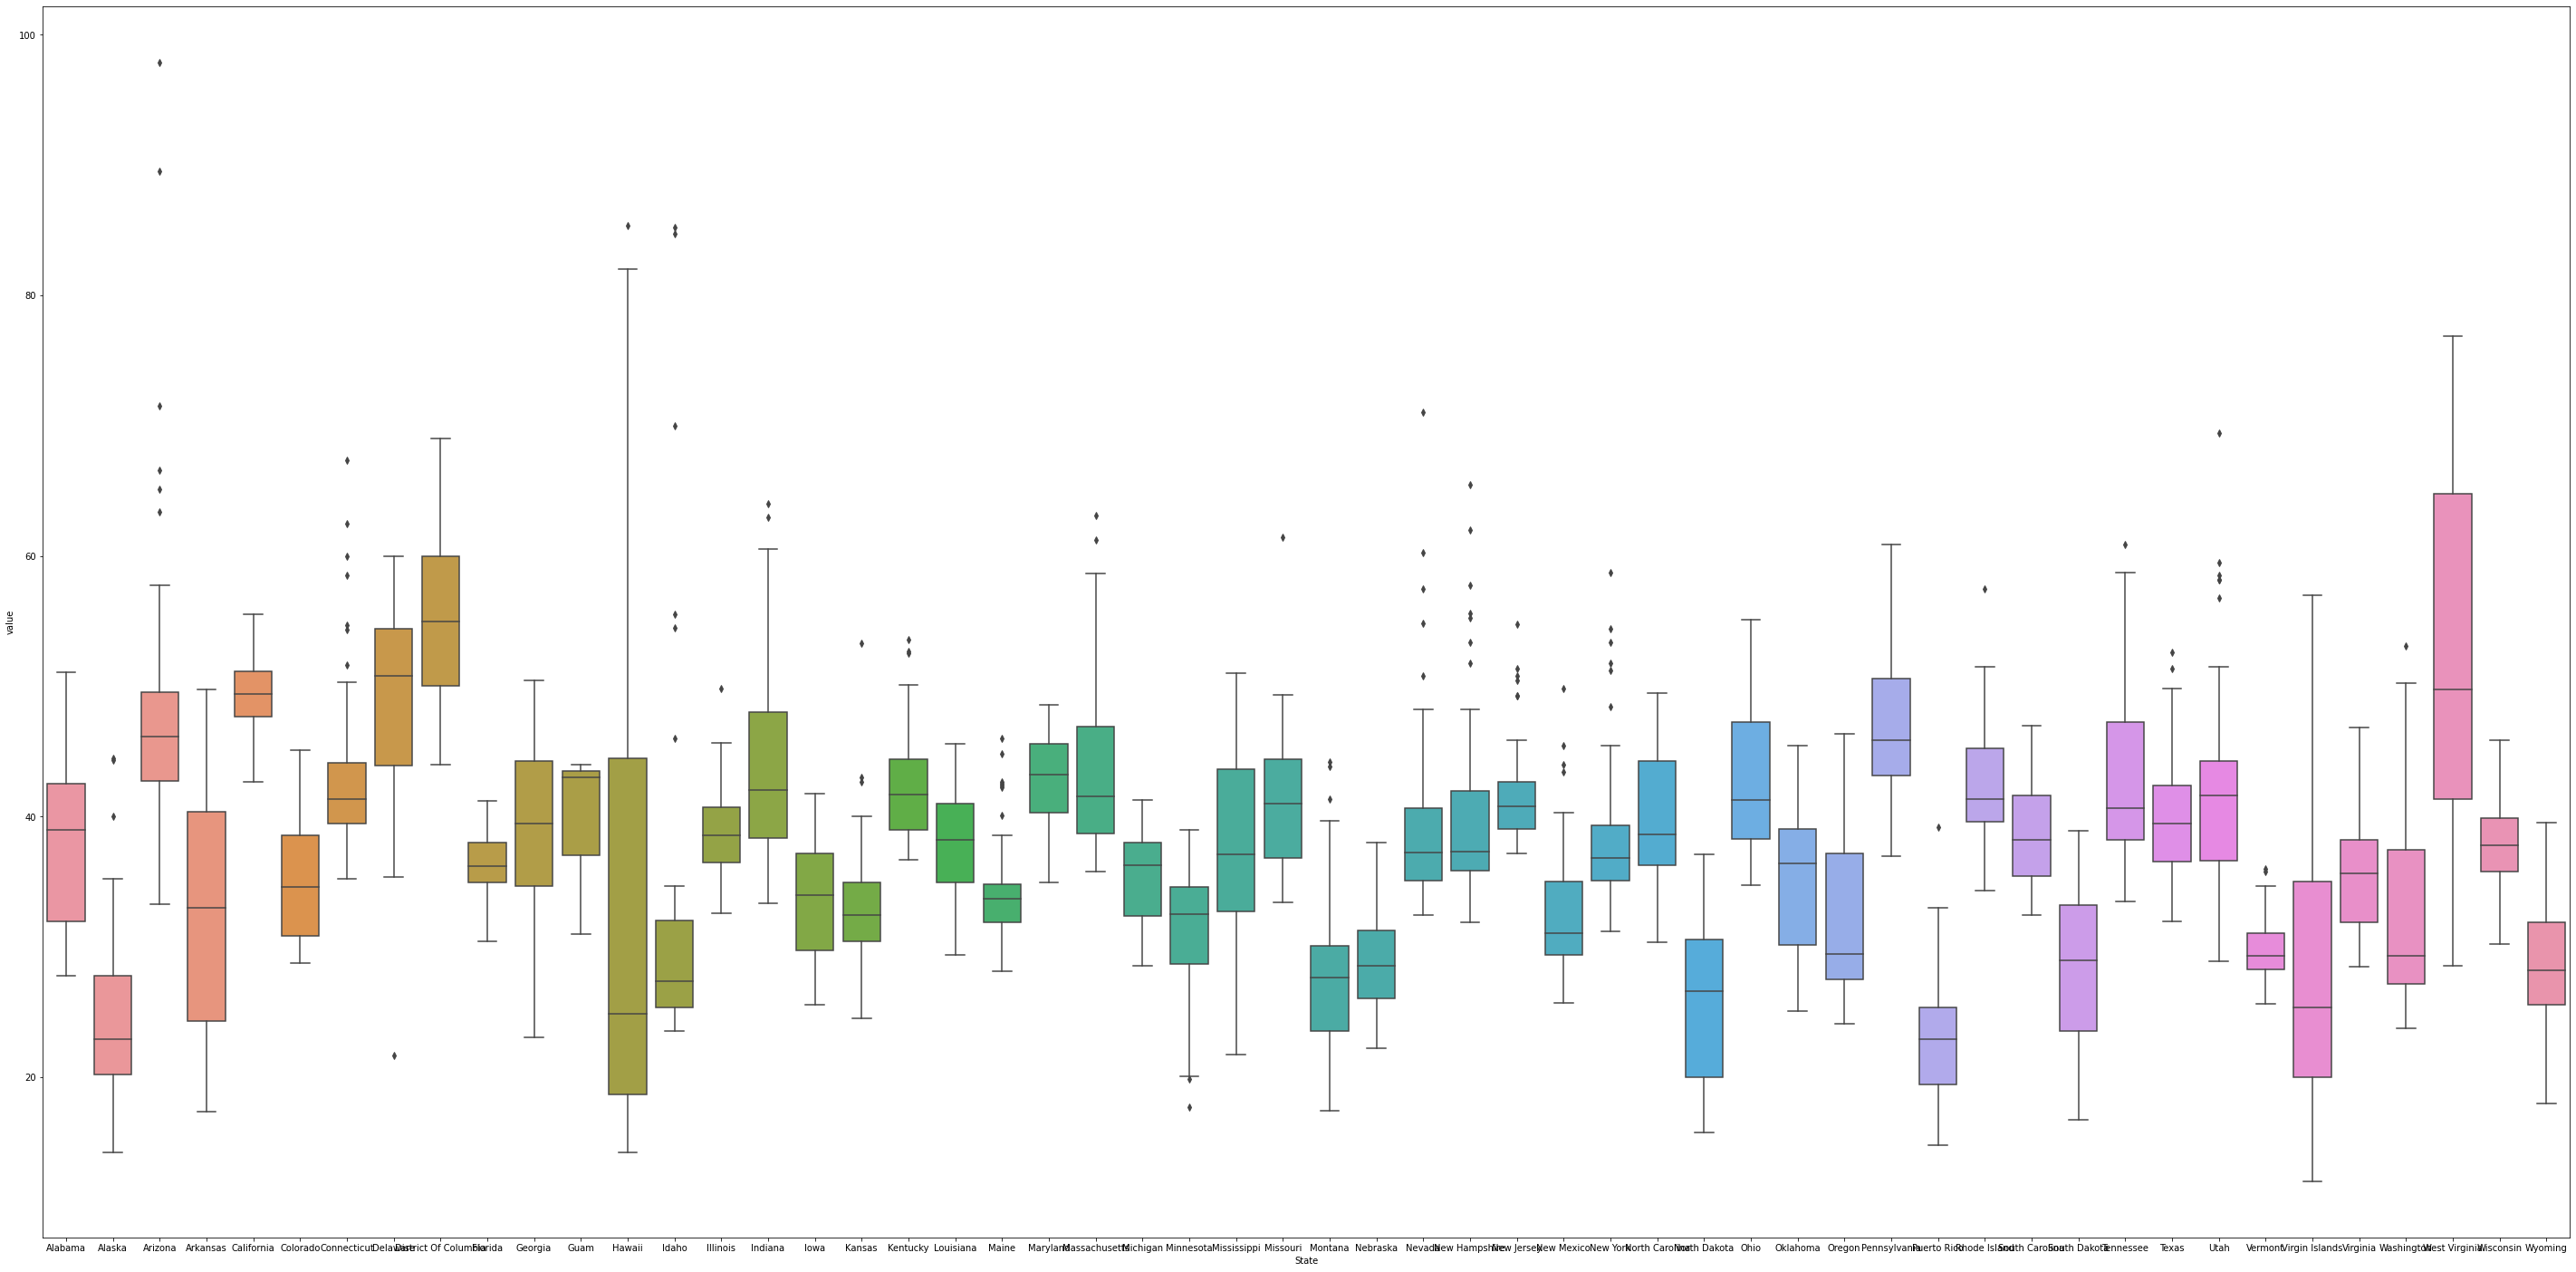

In [8]:

mean_df=mean_df.T
fig, ax = pyplot.subplots(figsize=(50,25))

sns.boxplot(x="State", y="value", data=pd.melt(mean_df))

Over the years the distribution of average Median AQIs is identical to the distribution of Median AQIs. Statewise, the spread of Average Median AQIs for the years has no comparable trend

## Question #4

Plot time series for the states with the largest and smallest values of AQI. Discuss the result.

In [9]:
new_df=mean_df.melt()
new_df

,State,value
0,Alabama,51.100000
1,Alabama,49.818182
2,Alabama,37.363636
3,Alabama,38.666667
4,Alabama,31.750000
...,...,...
2155,Wyoming,34.789474
2156,Wyoming,37.277778
2157,Wyoming,38.470588
2158,Wyoming,39.555556


In [10]:
min_val=new_df['value'].min()
max_val=new_df['value'].max()
print(min_val)
print(max_val)

12.0
97.9


In [11]:
min_val_state=new_df[new_df['value']==min_val]['State']
min_val_state

1952    Virgin Islands
Name: State, dtype: object

In [12]:
max_val_state=new_df[new_df['value']==max_val]['State']
max_val_state

81    Arizona
Name: State, dtype: object

In [13]:
max_min_data=df[["State", "Median AQI","Year"]]
md=max_min_data.groupby(["Year","State"]).mean()["Median AQI"]
md=md.to_frame().reset_index()
md

,Year,State,Median AQI
0,1980,Alabama,51.100000
1,1980,Alaska,35.250000
2,1980,Arizona,89.555556
3,1980,Arkansas,26.000000
4,1980,California,54.682927
...,...,...,...
2106,2019,Virginia,30.558824
2107,2019,Washington,25.193548
2108,2019,West Virginia,29.750000
2109,2019,Wisconsin,34.928571


In [14]:
md=md[(md['State']=='Virgin Islands') | (md['State']=='Arizona')]
md

,Year,State,Median AQI
2,1980,Arizona,89.555556
52,1981,Arizona,97.900000
102,1982,Arizona,63.400000
152,1983,Arizona,66.600000
196,1983,Virgin Islands,57.000000
...,...,...,...
1999,2017,Virgin Islands,19.500000
2007,2018,Arizona,44.923077
2052,2018,Virgin Islands,24.333333
2060,2019,Arizona,42.769231


[Text(0.5, 1.0, 'Avg Median AQI vs Year for states with Min and Max Median AQI')]

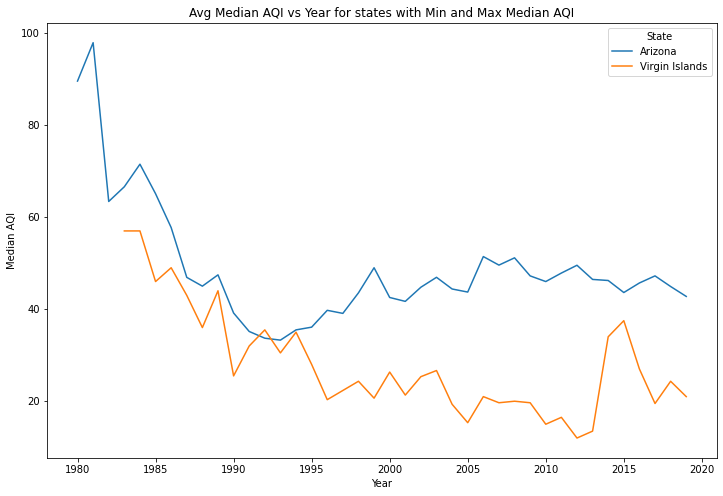

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(data=md,x="Year",y="Median AQI",hue= "State").set(title= "Avg Median AQI vs Year for states with Min and Max Median AQI")

For both the states, the value of Average Median AQI decreased from 1980 to 2019, though there are some irregularities in the middle years.

# Choropleth map

* [State Choropleth](https://observablehq.com/@d3/state-choropleth) -- D3 notebook -- observablehq.com
  * This is the source that has been modified for use in Jupyter.
* [State Choropleth (Jupyter)](https://observablehq.com/@pbogden/state-choropleth-jupyter@734)
  * We'll be using this code for visualization.

In [16]:
!pip install observable_jupyter 
from observable_jupyter import embed

embed("@pbogden/state-choropleth-jupyter@734")

# Question 5

Create a choropleth map of state-average Median AQI for 2019

In [17]:
mean_year_2019=df[['State','Year','Median AQI']][df['Year']==2019]
mean_year_2019=mean_year_2019.groupby(['State']).agg({'Median AQI':'mean'})
mean_year_2019=mean_year_2019['Median AQI'].to_dict()

In [18]:
chart_id = "@pbogden/state-choropleth-jupyter@734"
print('State average Median AQI for 2019')
mean_year_2019['title'] = "Median AQI"
mean_year_2019['titles'] = {}
for state in mean_year_2019.keys():
    
    mean_year_2019['titles'][state]=str(state)+'\n'+str(mean_year_2019[state])
embed(chart_id, cells=['chart'], inputs={'data': mean_year_2019})

State average Median AQI for 2019


# Question 6

Use the result from Question 5 to create a convenience function that for plotting one year's worth of data. The only argument to the convenience function should be the year of interest. Use it to plot 1980.

Describe the major differences between 1980 and 2019.


In [20]:
def plot_year(year):
  mean_year_=df[['State','Year','Median AQI']][df['Year']==year]
  mean_year_=mean_year_.groupby(['State']).agg({'Median AQI':'mean'})
  mean_year_=mean_year_['Median AQI'].to_dict()
  chart_id = "@pbogden/state-choropleth-jupyter@734"
  print('State average Median AQI for ',year)
  mean_year_['title'] = "Median AQI"
  mean_year_['titles'] = {}
  for state in mean_year_.keys():
    
      mean_year_['titles'][state]=str(state)+'\n'+str(mean_year_[state])
  
 
  print(mean_year_)
  embed(chart_id, cells=['chart'], inputs={'data': mean_year_})

In [21]:
plot_year(1980)

State average Median AQI for  1980
{'Alabama': 51.1, 'Alaska': 35.25, 'Arizona': 89.55555555555556, 'Arkansas': 26.0, 'California': 54.68292682926829, 'Colorado': 44.4, 'Connecticut': 67.33333333333333, 'Delaware': 40.666666666666664, 'District Of Columbia': 69.0, 'Florida': 34.523809523809526, 'Georgia': 23.066666666666666, 'Hawaii': 18.0, 'Idaho': 85.25, 'Illinois': 49.82608695652174, 'Indiana': 56.392857142857146, 'Iowa': 32.1, 'Kansas': 39.0, 'Kentucky': 53.56521739130435, 'Louisiana': 29.375, 'Maine': 46.0, 'Maryland': 48.54545454545455, 'Massachusetts': 51.333333333333336, 'Michigan': 36.6, 'Minnesota': 39.0, 'Mississippi': 23.5, 'Missouri': 61.44444444444444, 'Montana': 39.111111111111114, 'Nebraska': 31.0, 'Nevada': 71.0, 'New Hampshire': 65.5, 'New Jersey': 54.75, 'New Mexico': 37.0, 'New York': 58.708333333333336, 'North Carolina': 44.666666666666664, 'North Dakota': 20.0, 'Ohio': 48.25806451612903, 'Oklahoma': 33.0, 'Oregon': 43.57142857142857, 'Pennsylvania': 60.86956521739

The avg Median AQI for most states increased in 2019 compared to 1980

# Question 7

Compute decadal averages by state for 1980s, 1990s, 2000s, and 2010s. Use a convenience function to minimize the amount of code, and make sure you choose colors that allow comparison over time.

In [22]:
def plot_decadal(decade):
  mean_year_=df[['State','Year','Median AQI']][(df['Year']>=decade)&(df['Year']>=decade+9)]
  mean_year_=mean_year_.groupby(['State']).agg({'Median AQI':'mean'})
  mean_year_=mean_year_['Median AQI'].to_dict()
  chart_id = "@pbogden/state-choropleth-jupyter@734"
  print('State average Median AQI for the decade of ',decade)
  mean_year_['title'] = "Median AQI"
  mean_year_['titles'] = {}
  for state in mean_year_.keys():
    
      mean_year_['titles'][state]=str(state)+'\n'+str(mean_year_[state])
  embed(chart_id, cells=['chart'], inputs={'data': mean_year_})

In [23]:
plot_decadal(1980)

State average Median AQI for the decade of  1980


In [24]:
plot_decadal(1990)

State average Median AQI for the decade of  1990


In [25]:
plot_decadal(2000)

State average Median AQI for the decade of  2000


In [26]:
plot_decadal(2010)

State average Median AQI for the decade of  2010
